In this assignment you will be using the happy or sad dataset, which contains 80 images of emoji-like faces, 40 happy and 40 sad.

Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Sample happy image:


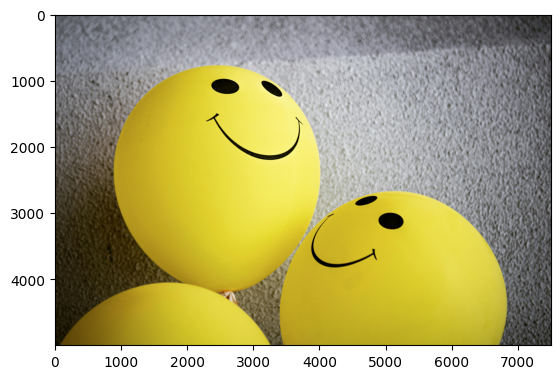


Sample sad image:


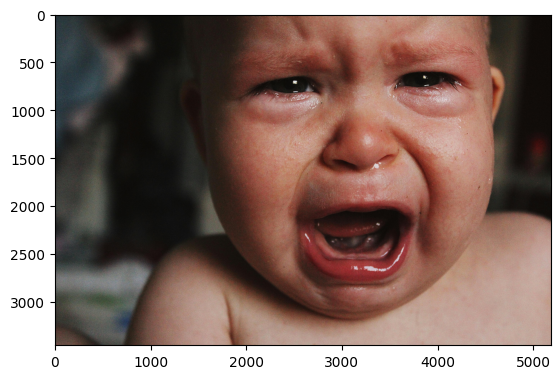

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "./data/happy/"
sad_dir = "./data/sad/"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (4997, 7500, 3)
The maximum pixel value used is: 255.0


In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory='./data/',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    ### END CODE HERE

    return train_generator
    

In [9]:
# Save your generator in a variable
gen = image_generator()

# Expected output: 'Found 80 images belonging to 2 classes'

Found 54 images belonging to 2 classes.


In [12]:
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model, you can toy around with the architecture.
    # Some helpful tips in case you are stuck:
    
    # - A good first layer would be a Conv2D layer with an input shape that matches 
    #   that of every image in the training set (including the color dimension)

    # - The model will work best with 3 convolutional layers

    # - There should be a Flatten layer in between convolutional and dense layers

    # - The final layer should be a Dense layer with the number of units 
    #   and activation function that supports binary classification.

    model = tf.keras.models.Sequential([ 
        # First convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Second convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Third convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten
        tf.keras.layers.Flatten(),
        # Dense layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 
    
    ### END CODE HERE
    return history

In [13]:
hist = train_happy_sad_model(gen)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-10 15:31:18.506315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6250 - loss: 3.3294

2024-04-10 15:31:23.098161: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.5143 - loss: 3.3271
Epoch 2/20


2024-04-10 15:31:36.472262: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.8195 

2024-04-10 15:31:39.292375: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.5463 - loss: 0.7798
Epoch 3/20


2024-04-10 15:31:52.003132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7000 - loss: 0.5746 

2024-04-10 15:31:54.518972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.6766 - loss: 0.6383
Epoch 4/20


2024-04-10 15:32:06.553802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8929 - loss: 0.5084 

2024-04-10 15:32:09.467058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6823 - loss: 0.6129
Epoch 5/20


2024-04-10 15:32:21.476503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7000 - loss: 0.5452 

2024-04-10 15:32:24.158305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6297 - loss: 0.5999
Epoch 6/20


2024-04-10 15:32:36.110453: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5750 - loss: 0.6056 

2024-04-10 15:32:39.015989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.5985 - loss: 0.5942
Epoch 7/20


2024-04-10 15:32:50.867902: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


1/6 ━━━━━━━━━━━━━━━━━━━━ 1:15 15s/step - accuracy: 0.9000 - loss: 0.5048

2024-04-10 15:32:54.418475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.7608 - loss: 0.5795
Epoch 8/20


2024-04-10 15:33:06.743609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7500 - loss: 0.5067 

2024-04-10 15:33:11.895358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.7498 - loss: 0.5171
Epoch 9/20


2024-04-10 15:33:23.326609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6000 - loss: 0.8521 

2024-04-10 15:33:27.037315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.7070 - loss: 0.6584
Epoch 10/20


2024-04-10 15:33:40.515796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9250 - loss: 0.4231 

2024-04-10 15:33:41.274838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.8588 - loss: 0.5572
Epoch 11/20


2024-04-10 15:33:52.962499: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8250 - loss: 0.4466 

2024-04-10 15:33:55.797612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.8378 - loss: 0.3979
Epoch 12/20


2024-04-10 15:34:08.653903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9000 - loss: 0.2705 

2024-04-10 15:34:11.521677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.8792 - loss: 0.2940
Epoch 13/20


2024-04-10 15:34:22.105050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.2504 

2024-04-10 15:34:27.217962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9883 - loss: 0.2193
Epoch 14/20


2024-04-10 15:34:39.698039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9643 - loss: 0.0680 

2024-04-10 15:34:42.822909: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.9403 - loss: 0.1731
Epoch 15/20


2024-04-10 15:34:53.914404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9250 - loss: 0.1719 

2024-04-10 15:34:58.320361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9599 - loss: 0.1734
Epoch 16/20


2024-04-10 15:35:10.207380: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9750 - loss: 0.0724 

2024-04-10 15:35:12.887878: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9453 - loss: 0.1238
Epoch 17/20


2024-04-10 15:35:23.559310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.1230 

2024-04-10 15:35:27.540278: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9947 - loss: 0.1049
Epoch 18/20


2024-04-10 15:35:39.324680: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9722 - loss: 0.1146

2024-04-10 15:35:42.011720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.9244 - loss: 0.1774
Epoch 19/20


2024-04-10 15:35:53.000074: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 0.1127 

2024-04-10 15:35:56.421389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0916
Reached 99.9% accuracy so cancelling training!
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 1.0000 - loss: 0.0896


In [14]:

print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 19 epochs
